In [ ]:
%%capture
!pip install transformers
!pip install accelerate -U
!pip install --upgrade tensorflow
! pip install datasets
! pip install huggingface_hub


In [ ]:
from google.colab import drive


In [ ]:
import os

mount_point = "/content/MyDrive/deep-learning"
if not os.path.exists(mount_point):
    os.makedirs(mount_point)



In [ ]:
%%capture

##for data handling
import pandas as pd
import numpy  as np

##visualizations

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

##NLP

import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import re,string, unicodedata
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.corpus import wordnet
from collections import Counter
import string
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download("words")
import nltk
from nltk.corpus import gutenberg
from nltk import FreqDist




In [ ]:
train_path= '/content/drive/MyDrive/deep-learning/Train.csv'
test_path= '/content/drive/MyDrive/deep-learning/Test.csv'

In [ ]:

%%time
df_train= pd.read_csv(train_path)
df_test= pd.read_csv(test_path)

CPU times: user 62.4 ms, sys: 19 ms, total: 81.4 ms
Wall time: 545 ms


In [ ]:
##loading the dataset

df_train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [ ]:
df_test.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


## CRISP-DM Framework

- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment



In [ ]:
##before starting, I will like to rename safe_text column to tweets


df_train.rename(columns= {"safe_text": "tweets"}, inplace= True)
df_test.rename(columns= {"safe_text": "tweets"}, inplace= True)

In [ ]:
df_test.loc[:5]

,tweet_id,tweets
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."
5,01V1X8XW,I think that active duty soldiers should get v...


In [ ]:
df_train.loc[:5]

,tweet_id,tweets,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
5,OVNPOAUX,<user> a nearly 67 year old study when mental ...,1.0,0.666667


In [ ]:
##creating a copy

train_data= df_train.copy()
test_data= df_test.copy()

# 1. Data Understanding

Workflow:

- info
- Check for missing values
- Check for duplicates
- Plot some charts


## 1.1 Checking Info

In [ ]:
data=[df_train, df_test]
names=["df_train", "df_test"]



for m, i in zip(data, names):
  print(f"the info", i,"dataset are: ", "\n\n", m.info(), "\n\n", "---"*20 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   tweets     10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB
the info df_train dataset are:  

 None 

 ------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  5177 non-null   object
 1   tweets    5176 non-null   object
dtypes: object(2)
memory usage: 81.0+ KB
the info df_test dataset are:  

 None 

 ------------------------------------------------------------


In [ ]:
df_train.describe()

,label,agreement
count,10000.000000,9999.000000
mean,0.301567,0.854252
std,0.646718,0.180707
min,-1.000000,0.333333
25%,0.000000,0.666667
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
df_train.describe()

,label,agreement
count,10000.000000,9999.000000
mean,0.301567,0.854252
std,0.646718,0.180707
min,-1.000000,0.333333
25%,0.000000,0.666667
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


###1.2 Checking for Missing Values

In [ ]:
data=[df_train, df_test]
names=["df_train", "df_test"]



for m, i in zip(data, names):
  print(f"the missing values in the", i,"dataset are: ", "\n\n", m.isna().sum(), "\n\n", "---"*20 )

the missing values in the df_train dataset are:  

 tweet_id     0
tweets       0
label        1
agreement    2
dtype: int64 

 ------------------------------------------------------------
the missing values in the df_test dataset are:  

 tweet_id    0
tweets      1
dtype: int64 

 ------------------------------------------------------------


In [ ]:
##we will see the missing values

df_train[df_train["label"].isna()]
df_train[df_train["agreement"].isna()]

,tweet_id,tweets,label,agreement
4798,RQMQ0L2A,#lawandorderSVU,NaN,NaN
4799,I cannot believe in this day and age some pare...,1,0.666667,NaN


#### Notes after checking for missing values:

- We will drop them in the Data Preparation stage

## 1.3 Checking for Duplicates


In [ ]:

df_train[df_train.duplicated()]

,tweet_id,tweets,label,agreement


In [ ]:
df_test[df_train.duplicated()]

<ipython-input-19-3bea3efcab91>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test[df_train.duplicated()]


,tweet_id,tweets


### Notes after checking for duplicates



- There were no duplicates

## 1.3 Visualizations

##### i.Checking Distrubution of Sentiments

In [ ]:
fig_1=px.histogram(data_frame= df_train, x= "label", title= "Distrubution of Sentiments")
fig_1.show()

Notes:

- Most tweets were neutral
- There were more postive tweets than negative
- There is class imbalance
- There is a random value which doesn't belong to any of our predefined class

In [ ]:
##checking to find out the values of the random value:
df_train.label.unique()

array([ 0.        ,  1.        , -1.        ,         nan,  0.66666667])

In [ ]:
postive= df_train[df_train["label"]== 1]

In [ ]:
negative= df_train[df_train["label"]== -1]

In [ ]:
neutral= df_train[df_train["label"]== 0]

In [ ]:
negative.head(20)

,tweet_id,tweets,label,agreement
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
24,89AB846O,<user> #CDC lied and hid data that black boys ...,-1.0,1.000000
25,XSXFN1C8,<user> vaccines causing autism,-1.0,1.000000
35,6PMH7C56,"<user> <user> Other than that, his defense is ...",-1.0,0.333333
47,G1CJ54KD,<user> I'm not vaccinating my kids lol,-1.0,1.000000
58,Y3OMTB1Q,<user> yeah. I'll just stick to my regular vac...,-1.0,0.666667
62,ZCOLETM5,CIA: No more vaccination campaigns in spy ops ...,-1.0,0.666667
65,E88B1XQJ,Vaccine Brain Damage Cover Up Implodes: <url> ...,-1.0,1.000000
89,43MWGI00,Centers for Disease Control: This Year’s Flu V...,-1.0,0.666667


In [ ]:

negative.loc[138]["tweets"]

"Pro safety doesn't make me an anti-vaxer.  It makes me an educated consumer #CDCwhistleblower #CDCfraud #MyKidMatters #VaccineInjuryIsReal"

##### ii.Using a WordCloud to Visualize Frequent Words

In [ ]:
##instantiating my Stopwords variable

stopwords= STOPWORDS

In [ ]:
len(stopwords)

192

In [ ]:
##initializing my Wordcloud library

wc= WordCloud(background_color= "black",

              stopwords=stopwords,

              height= 600,

              width= 400

              )

In [ ]:
train_tweets= df_train["tweets"].dropna()

In [ ]:
##converting all textin various rows into a single string

train_text= " ".join(train_tweets)

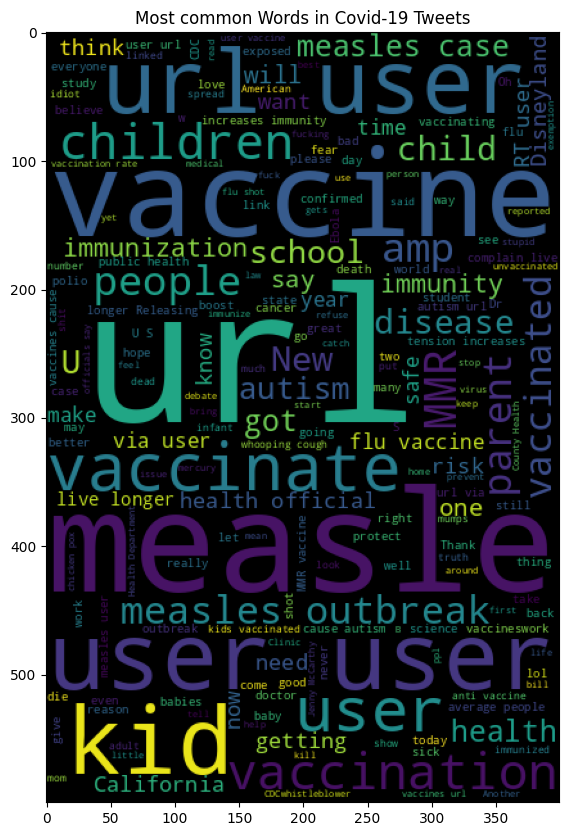

In [ ]:
wc_train= wc.generate(train_text)
plt.figure(figsize= (15,10))
plt.title("Most common Words in Covid-19 Tweets")
plt.imshow(wc_train)


the most tweeted words are:

- URL
- Measles
- Outbreak
- User
- Kid
- AMP
- Disneyland
- Autism



### iii.Length of Tweets

In [ ]:
df_train["tweet_length"]= [len(i.split(" ")) for i in df_train["tweets"]]

In [ ]:
df_train.loc[:5]

,tweet_id,tweets,label,agreement,tweet_length
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000,15
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000,25
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000,7
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000,28
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000,20
5,OVNPOAUX,<user> a nearly 67 year old study when mental ...,1.0,0.666667,22


In [ ]:
df_train["tweet_length"].max()

33

In [ ]:
tweet_len= df_train["tweet_length"].value_counts().reset_index()

In [ ]:
tweet_len.columns= ["tweet_length", "count"]

In [ ]:
##visualizaing the length of my tweets

fig_2= px.scatter(data_frame= tweet_len, x= "tweet_length", y= "count", size= "count", color= "tweet_length", title= "Length of Tweets")

fig_2.show()

#### Notes:

- Most tweets are 18 words of length

# 2. Data Preparation

Workflow:

- Handle Issues we discovered during our exploration
- drop unecessary columns
- Perform NLP Preprocessing steps

## 2.1  Handling Issues Discovered During Exploration

#### i. Missing values

- Since the missing values are just a few, we will just drop them

In [ ]:
df_train= df_train.dropna()

In [ ]:
df_test= df_test.dropna()

In [ ]:
df_train.isna().sum()

tweet_id        0
tweets          0
label           0
agreement       0
tweet_length    0
dtype: int64

In [ ]:
df_test.isna().sum()

tweet_id    0
tweets      0
dtype: int64

##### ii.Handling the abnormal value

In [ ]:
df_train["label"].unique()

array([ 0.,  1., -1.])

In [ ]:
##since it has been handled, we will proceed to the next step

## 2.2 Dropping Unecesary Columns

- I will be dropping the tweet ID column since it holds no inherent value

In [ ]:
df_train= df_train.drop("tweet_id", axis=1)
df_test= df_test.drop("tweet_id", axis=1)

In [ ]:
df_train.head()

,tweets,label,agreement,tweet_length
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,15
1,I'm 100% thinking of devoting my career to pro...,1.0,1.0,25
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,7
3,I mean if they immunize my kid with something ...,-1.0,1.0,28
4,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,20


In [ ]:
df_test.head()

,tweets
0,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,Students starting school without whooping coug...
2,"I'm kinda over every ep of <user> being ""rippe..."
3,How many innocent children die for lack of vac...
4,"CDC eyeing bird flu vaccine for humans, though..."


## 2.3 NLP Preprocessing Steps

###i. Converting Everything to Lowercase

In [ ]:
df_train["tweets"]= df_train["tweets"].str.lower()
df_test["tweets"]= df_test["tweets"].str.lower()

### ii.Removing Punctuations

In [ ]:
##using regex to remove punctuations and replace them with a space


In [ ]:
##removing hashtags:

def punctuation_remover(text):
  ##removing has tags
  text= re.sub(r'#\w+', '', text)
  ##removing punctuations
  text= re.sub("[^\w\s]", repl= "", string=text)
  return text


In [ ]:
##creating a new
df_train["clean_tweet"]= df_train["tweets"].apply(punctuation_remover)

In [ ]:
df_test["clean_tweet"]= df_test["tweets"].apply(punctuation_remover)

In [ ]:
df_train.loc[:100]

,tweets,label,agreement,tweet_length,clean_tweet
0,me &amp; the big homie meanboy3000 #meanboy #m...,0.0,1.000000,15,me amp the big homie meanboy3000 stegman...
1,i'm 100% thinking of devoting my career to pro...,1.0,1.000000,25,im 100 thinking of devoting my career to provi...
2,"#whatcausesautism vaccines, do not vaccinate y...",-1.0,1.000000,7,vaccines do not vaccinate your child
3,i mean if they immunize my kid with something ...,-1.0,1.000000,28,i mean if they immunize my kid with something ...
4,thanks to <user> catch me performing at la nui...,0.0,1.000000,20,thanks to user catch me performing at la nuit ...
...,...,...,...,...,...
96,“<user> people who complain live longer. relea...,0.0,1.000000,19,user people who complain live longer releasing...
97,austerity is not a vaccine to crisis... it is ...,0.0,1.000000,20,austerity is not a vaccine to crisis it is a p...
98,“<user> compensation for autism brain damage a...,0.0,0.666667,15,user compensation for autism brain damage and ...
99,is it that i seek to bear w/ them? is it that ...,0.0,0.666667,24,is it that i seek to bear w them is it that i ...


In [ ]:
df_test.loc[10:25]

,tweets,clean_tweet
10,<user> : i have built up immunity to those di...,user i have built up immunity to those disea...
11,<user> <user> <user> study of 1.3 million kids...,user user user study of 13 million kids reveal...
12,vaccines :-0 (@ cherokee county health departm...,vaccines 0 cherokee county health department url
13,<user> are you sure you want to come back to a...,user are you sure you want to come back to a m...
14,oh well <user> an 18-month-old who had not bee...,oh well user an 18monthold who had not been va...
15,kcmo health depart:if you want a nasal flu vac...,kcmo health departif you want a nasal flu vacc...
16,a stipulation on jay's contract should be that...,a stipulation on jays contract should be that ...
17,"if you do not vaccinate your children, let me ...",if you do not vaccinate your children let me k...
18,currently at the health department waiting for...,currently at the health department waiting for...
19,"<user> <user> <user> <user> <user> and again, ...",user user user user user and again they do hav...


## iii.Removing Stop words

In [ ]:
##viewing my stopwrods
" ".join(STOPWORDS)

"on i why's such been during me we've no have himself your just not she'll since when against both how out do for it her he same com did very over own www couldn't she's then further there here's does therefore again these http yourselves can't through of i'd where's a as were theirs only with could when's some you'll more you're hadn't itself k yourself before are few can those had doing here she that's we're how's his who he's wouldn't aren't below each once i'm like their won't between whom who's they'd about they've most themselves our you should off the weren't what's down they'll hers she'd be don't until why also by he'll an shouldn't you've we'll under so because yours than into is isn't too from he'd him nor we you'd hence i'll doesn't get that what myself in there's else having they if let's my being wasn't however was after but them didn't has ought shan't this cannot all hasn't above am we'd any otherwise while herself mustn't they're at and haven't ours up ourselves where 

In [ ]:
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in stopwords])

In [ ]:
df_train["clean_tweet"]= df_train["clean_tweet"].apply(lambda x: remove_stopwords(x))

In [ ]:
df_train.loc[10:20]

,tweets,label,agreement,tweet_length,clean_tweet
10,"<user> @ this point i have 2 text, butw/bon jo...",0.0,1.000000,25,user point 2 text butwbon jovi cover playin al...
11,"my prediction, vaccine exemption in arizona wi...",0.0,0.666667,18,prediction vaccine exemption arizona will end ...
12,getting my vaccines ! #china #nervous #moving ...,1.0,1.000000,16,getting vaccines cheryl southern nevada health...
13,1$mug noche <user> #mmr #mixmasterrod #dcdj #m...,0.0,1.000000,13,1mug noche user mad hatter url
14,got my influenza vaccine! (@ purdue university...,1.0,0.666667,13,got influenza vaccine purdue university studen...
15,sb121 [enroll] meningococcal disease-pupils to...,0.0,0.666667,12,sb121 enroll meningococcal diseasepupils immun...
16,increasing number of parents skip vaccinations...,0.0,1.000000,12,increasing number parents skip vaccinations ch...
17,<user> thank you for standing with ca parents ...,1.0,1.000000,16,user thank standing ca parents children suppor...
18,"dude idc if disney land has the measles, that ...",0.0,1.000000,20,dude idc disney land measles means shorter lin...
19,beeftalk: start your calf vaccinations now <ur...,1.0,1.000000,14,beeftalk start calf vaccinations now url via u...


In [ ]:
df_test["clean_tweet"]= df_test["clean_tweet"].apply(lambda x: remove_stopwords(x))

In [ ]:
df_test.loc[900:1000]

,tweets,clean_tweet
900,i wanna dip myself in a vat of purell after th...,wanna dip vat purell doctors officethey safe r...
901,division of public health launches community i...,division public health launches community immu...
902,she's a puss. haha scared of her vaccines. poo...,shes puss haha scared vaccines poor baby spruc...
903,researcher says cdc 'chose to cover up' data l...,researcher says cdc chose cover data linking a...
904,"disney measles outbreak could get worse, exper...",disney measles outbreak worse experts warn url
...,...,...
996,free back-to-school immunizations <url> <url>,free backtoschool immunizations url url
997,lesson of the day: vaccinate your children or ...,lesson day vaccinate children disney will kill...
998,<user> i have read some articles about the vac...,user read articles vaccine say high incident p...
999,<user> #gop stop blaming #immigrants first #eb...,user stop blaming first now diseasesbrought an...


### iii.Removing Unnecesary words and Cleaning

In [ ]:
clean_tweet= " ".join(df_train["clean_tweet"])

In [ ]:
freq= FreqDist([word for word in clean_tweet.split()])

In [ ]:
freq.most_common(10)

[('user', 5499),
 ('url', 4630),
 ('measles', 3176),
 ('vaccine', 1469),
 ('kids', 1258),
 ('vaccines', 1189),
 ('health', 1066),
 ('vaccinate', 905),
 ('children', 831),
 ('people', 702)]

I will get rid of the words:

- user
- url


In [ ]:
## to help me get more meaning to each word, I am going to use bigrams and trigrams.
words= " ".join(df_train["clean_tweet"])

tokens= nltk.word_tokenize(words)

bigrams= list(nltk.bigrams(tokens))

bigrams

[('amp', 'big'),
 ('big', 'homie'),
 ('homie', 'meanboy3000'),
 ('meanboy3000', 'stegman'),
 ('stegman', 'st'),
 ('st', 'url'),
 ('url', 'im'),
 ('im', '100'),
 ('100', 'thinking'),
 ('thinking', 'devoting'),
 ('devoting', 'career'),
 ('career', 'proving'),
 ('proving', 'autism'),
 ('autism', 'isnt'),
 ('isnt', 'caused'),
 ('caused', 'vaccines'),
 ('vaccines', 'due'),
 ('due', 'idiotic'),
 ('idiotic', 'posts'),
 ('posts', 'ive'),
 ('ive', 'seen'),
 ('seen', 'world'),
 ('world', 'autism'),
 ('autism', 'day'),
 ('day', 'vaccines'),
 ('vaccines', 'vaccinate'),
 ('vaccinate', 'child'),
 ('child', 'mean'),
 ('mean', 'immunize'),
 ('immunize', 'kid'),
 ('kid', 'something'),
 ('something', 'wont'),
 ('wont', 'secretly'),
 ('secretly', 'kill'),
 ('kill', 'years'),
 ('years', 'line'),
 ('line', 'im'),
 ('im', 'dont'),
 ('dont', 'trust'),
 ('trust', 'thanks'),
 ('thanks', 'user'),
 ('user', 'catch'),
 ('catch', 'performing'),
 ('performing', 'la'),
 ('la', 'nuit'),
 ('nuit', 'nyc'),
 ('nyc', '11

In [ ]:
trigrams= list(nltk.trigrams(tokens))

trigrams

[('amp', 'big', 'homie'),
 ('big', 'homie', 'meanboy3000'),
 ('homie', 'meanboy3000', 'stegman'),
 ('meanboy3000', 'stegman', 'st'),
 ('stegman', 'st', 'url'),
 ('st', 'url', 'im'),
 ('url', 'im', '100'),
 ('im', '100', 'thinking'),
 ('100', 'thinking', 'devoting'),
 ('thinking', 'devoting', 'career'),
 ('devoting', 'career', 'proving'),
 ('career', 'proving', 'autism'),
 ('proving', 'autism', 'isnt'),
 ('autism', 'isnt', 'caused'),
 ('isnt', 'caused', 'vaccines'),
 ('caused', 'vaccines', 'due'),
 ('vaccines', 'due', 'idiotic'),
 ('due', 'idiotic', 'posts'),
 ('idiotic', 'posts', 'ive'),
 ('posts', 'ive', 'seen'),
 ('ive', 'seen', 'world'),
 ('seen', 'world', 'autism'),
 ('world', 'autism', 'day'),
 ('autism', 'day', 'vaccines'),
 ('day', 'vaccines', 'vaccinate'),
 ('vaccines', 'vaccinate', 'child'),
 ('vaccinate', 'child', 'mean'),
 ('child', 'mean', 'immunize'),
 ('mean', 'immunize', 'kid'),
 ('immunize', 'kid', 'something'),
 ('kid', 'something', 'wont'),
 ('something', 'wont', 'sec

#### Approach
- We will get rid of numbers
- We will get rid of the two words

##### a. Number Remover

In [ ]:
def number_remover(text):
  text= re.sub(r'\d+', '', text)
  return " ".join([word for word in text.split() if not word.isdigit()])

In [ ]:
df_train["clean_tweet"]= df_train["clean_tweet"].apply(number_remover)

##### b.Text remover

In [ ]:
def text_remover(text):
  return " ".join([word for word in text.split() if word not in ["user", "url"]])

In [ ]:
df_train["clean_tweet"]= df_train["clean_tweet"].apply(lambda x: text_remover(x))

In [ ]:
df_train.head()

,tweets,label,agreement,tweet_length,clean_tweet
0,me &amp; the big homie meanboy3000 #meanboy #m...,0.0,1.0,15,amp big homie meanboy stegman st
1,i'm 100% thinking of devoting my career to pro...,1.0,1.0,25,im thinking devoting career proving autism isn...
2,"#whatcausesautism vaccines, do not vaccinate y...",-1.0,1.0,7,vaccines vaccinate child
3,i mean if they immunize my kid with something ...,-1.0,1.0,28,mean immunize kid something wont secretly kill...
4,thanks to <user> catch me performing at la nui...,0.0,1.0,20,thanks catch performing la nuit nyc st ave sho...


In [ ]:
## now let's visualize our most frequent words
word= " ".join(df_train["clean_tweet"])
freq= FreqDist(word.split())
top_20= pd.DataFrame(freq.most_common(20), columns= ["word", "count"])

top_20

,word,count
0,measles,3177
1,vaccine,1469
2,kids,1260
3,vaccines,1190
4,health,1066
5,vaccinate,905
6,children,831
7,people,702
8,dont,677
9,mmr,619


In [ ]:
## Visualizing my dataset again

In [ ]:
px.treemap(data_frame=top_20, path=["word"], values= "count", title= "Top 20 Most Frequent Words")

In [ ]:
words= " ".join(df_train["clean_tweet"]).split()

dist=FreqDist(words)

dist.most_common(300)

[('measles', 3177),
 ('vaccine', 1469),
 ('kids', 1260),
 ('vaccines', 1190),
 ('health', 1066),
 ('vaccinate', 905),
 ('children', 831),
 ('people', 702),
 ('dont', 677),
 ('mmr', 619),
 ('vaccinated', 601),
 ('outbreak', 590),
 ('autism', 589),
 ('immunity', 548),
 ('amp', 535),
 ('parents', 517),
 ('vaccinations', 505),
 ('child', 465),
 ('school', 434),
 ('vaccination', 430),
 ('cases', 419),
 ('flu', 387),
 ('im', 361),
 ('disease', 359),
 ('new', 337),
 ('now', 331),
 ('us', 321),
 ('got', 302),
 ('officials', 284),
 ('will', 267),
 ('cause', 267),
 ('county', 254),
 ('live', 245),
 ('disneyland', 241),
 ('one', 240),
 ('getting', 239),
 ('cdc', 223),
 ('diseases', 220),
 ('immunization', 217),
 ('via', 216),
 ('know', 205),
 ('ebola', 204),
 ('rt', 203),
 ('vaccinating', 202),
 ('say', 200),
 ('case', 199),
 ('think', 199),
 ('california', 197),
 ('need', 193),
 ('baby', 190),
 ('kid', 188),
 ('immunizations', 188),
 ('go', 184),
 ('longer', 179),
 ('may', 178),
 ('want', 177),


In [ ]:
##we will do some further cleaning

df_train["clean_tweet"]= df_train["clean_tweet"].apply(lambda x : x.replace("ppl","people"))


### iv. Feature Engineering







**Approach: **

- filter out the most important columns from our train dataframe
- Perform feature engineering


In [ ]:
df_train.loc[:57]

,tweets,label,agreement,tweet_length,clean_tweet
0,me &amp; the big homie meanboy3000 #meanboy #m...,0.0,1.000000,15,amp big homie meanboy stegman st
1,i'm 100% thinking of devoting my career to pro...,1.0,1.000000,25,im thinking devoting career proving autism isn...
2,"#whatcausesautism vaccines, do not vaccinate y...",-1.0,1.000000,7,vaccines vaccinate child
3,i mean if they immunize my kid with something ...,-1.0,1.000000,28,mean immunize kid something wont secretly kill...
4,thanks to <user> catch me performing at la nui...,0.0,1.000000,20,thanks catch performing la nuit nyc st ave sho...
5,<user> a nearly 67 year old study when mental ...,1.0,0.666667,22,nearly year old study mental health studies va...
6,"study of more than 95,000 kids finds no link b...",1.0,0.666667,15,study kids finds link mmr vaccine autism
7,psa: vaccinate your fucking kids,1.0,1.000000,5,psa vaccinate fucking kids
8,coughing extra on the shuttle and everyone thi...,1.0,0.666667,14,coughing extra shuttle everyone thinks measles
9,aids vaccine created at oregon health &amp; sc...,1.0,0.666667,17,aids vaccine created oregon health amp science...


In [ ]:
clean_train= df_train[["clean_tweet", "label", "agreement"]]

In [ ]:
clean_train.loc[:10]

,clean_tweet,label,agreement
0,amp big homie meanboy stegman st,0.0,1.000000
1,im thinking devoting career proving autism isn...,1.0,1.000000
2,vaccines vaccinate child,-1.0,1.000000
3,mean immunize kid something wont secretly kill...,-1.0,1.000000
4,thanks catch performing la nuit nyc st ave sho...,0.0,1.000000
5,nearly year old study mental health studies va...,1.0,0.666667
6,study kids finds link mmr vaccine autism,1.0,0.666667
7,psa vaccinate fucking kids,1.0,1.000000
8,coughing extra shuttle everyone thinks measles,1.0,0.666667
9,aids vaccine created oregon health amp science...,1.0,0.666667


#####. a. creating word length

In [ ]:
##i am just creting a copy of the dataframe

clean_copy= clean_train.copy()

 ### c.Lemmatization

In [ ]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
clean_train["clean_tweet"]= clean_train["clean_tweet"].apply(lemmatize_text)

<ipython-input-81-d612f78670a4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_train.loc[:50]

,clean_tweet,label,agreement
0,amp big homie meanboy stegman st,0.0,1.000000
1,im thinking devoting career proving autism isn...,1.0,1.000000
2,vaccine vaccinate child,-1.0,1.000000
3,mean immunize kid something wont secretly kill...,-1.0,1.000000
4,thanks catch performing la nuit nyc st ave sho...,0.0,1.000000
5,nearly year old study mental health study vacc...,1.0,0.666667
6,study kid find link mmr vaccine autism,1.0,0.666667
7,psa vaccinate fucking kid,1.0,1.000000
8,coughing extra shuttle everyone think measles,1.0,0.666667
9,aid vaccine created oregon health amp science ...,1.0,0.666667


#####c.adding Character Length

In [ ]:
def remove_special_characters(input_string):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_string = re.sub(pattern, '', input_string)
    return cleaned_string

In [ ]:
clean_train["clean_tweet"]= clean_train["clean_tweet"].apply(remove_special_characters)

<ipython-input-84-6b2ad17c11ce>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_copy = clean_copy.dropna()
clean_train = clean_train.dropna()

In [ ]:
clean_copy.to_csv("/content/drive/MyDrive/deep-learning/clean_copy.csv")

In [ ]:
clean_copy.shape

(9999, 3)

In [ ]:
clean_train.isna().sum()

clean_tweet    0
label          0
agreement      0
dtype: int64